# PR-22e-09 - Evaluation
### $G  = 2.40\,G_0$
### $\tau_i = \{???\}$

kommt aus 2.09, aber ist sicher ein anderer kontakt
- 2023-11-02_high_tau_2_G0_stripline.hdf5 

In [1]:
# initialize stuff
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import sys
import importlib
import logging

import numpy as np
import matplotlib.pyplot as plt

sys.path.append("/Users/oliver/Documents/p5control-bluefors-evaluation")
sys.path.append("/home/oliver/Documents/p5control-bluefors-evaluation")

from utilities.baseclass import BaseClass
from utilities.baseevaluation import BaseEvaluation
from utilities.baseplot import BasePlot
from utilities.ivevaluation import IVEvaluation

importlib.reload(sys.modules["utilities.baseclass"])
importlib.reload(sys.modules["utilities.baseevaluation"])
importlib.reload(sys.modules["utilities.baseplot"])
importlib.reload(sys.modules["utilities.ivevaluation"])

import utilities.basefunctions
importlib.reload(sys.modules["utilities.basefunctions"])

from utilities.corporate_design_colors_v4 import cmap
importlib.reload(sys.modules["utilities.corporate_design_colors_v4"])

importlib.reload(logging)
logger = logging.getLogger(__name__)
logging.basicConfig(level=logging.INFO, format="%(message)s")
# pip install numpy matplotlib scipy tqdm torch hdf5view h5py PySide6

In [2]:
# Settings of Evaluation
from utilities.ivevaluation import IVEvaluation

importlib.reload(sys.modules["utilities.ivevaluation"])

eva = IVEvaluation()
eva.file_directory = "/Volumes/speedyboy/atomic-contact/"
eva.file_folder = "2.40 G_0/"
eva.setAmplifications(10000, 1000)
eva.setV(1e-3, voltage_bins=4000)
eva.setI(200e-9, current_bins=2000)
eva.downsample_frequency = 43
eva.eva_temperature = True

eva.file_name = "2023-11-02_high_tau_2_G0_stripline.hdf5"
eva.showMeasurements()

(base) ... BaseClass initialized.
(base eva) ... BaseEvaluation initialized.
(iv eva) ... IVEvaluation initialized.
(base eva) Available measurements:
- "critical field"
- "frequency_at_-20dBm"
- "frequency_at_-25dBm"
- "frequency_at_15GHz"
- "frequency_at_19.3GHz"
- "frequency_at_7.8GHz"


In [3]:
# Evaluating Amplitude Studies

eva.sub_folder = "amplitude study"
eva.file_name = "2023-11-02_high_tau_2_G0_stripline.hdf5"

eva.setA(0, 0.25, 250)

eva.title = "Amplitude Study (15GHz, Stripline)"
eva.setMeasurement("frequency_at_15GHz")
eva.setKeys(index_0=3, index_1=-3, norm=1)
eva.addKey("nu=-31.0dBm", -1000)
(eva.up_sweep,) = eva.getMaps([1])
(eva.up_sweep,) = eva.getMapsAmplitude([eva.up_sweep])
eva.y_axis = eva.amplitude_axis
eva.saveData()

eva.setA(0, 0.09, 90)

eva.title = "Amplitude Study (7.8GHz, Stripline)"
eva.setMeasurement("frequency_at_7.8GHz")
eva.setKeys(index_0=3, index_1=-3, norm=1)
eva.addKey("nu=-31.0dBm", -1000)
(eva.up_sweep,) = eva.getMaps([1])
(eva.up_sweep,) = eva.getMapsAmplitude([eva.up_sweep])
eva.y_axis = eva.amplitude_axis
eva.saveData()

eva.title = "Amplitude Study (19.3GHz, Stripline)"
eva.setMeasurement("frequency_at_19.3GHz")
eva.setKeys(index_0=3, index_1=-3, norm=1)
eva.addKey("nu=-31.0dBm", -1000)
(eva.up_sweep,) = eva.getMaps([1])
(eva.up_sweep,) = eva.getMapsAmplitude([eva.up_sweep])
eva.y_axis = eva.amplitude_axis
eva.saveData()

(base) Amplitude Study (15GHz, Stripline)
(iv eva) getBackupTemperature()


100%|██████████| 33/33 [00:03<00:00,  8.50it/s]
(iv eva) getMapsAmplitude()
(base) saveData()
(base) Amplitude Study (7.8GHz, Stripline)
100%|██████████| 23/23 [00:02<00:00, 11.10it/s]
(iv eva) getMapsAmplitude()
(base) saveData()
(base) Amplitude Study (19.3GHz, Stripline)
100%|██████████| 23/23 [00:02<00:00,  9.97it/s]
(iv eva) getMapsAmplitude()
(base) saveData()


In [4]:
# Evaluating Frequency Studies

eva.sub_folder = "frequency study"
eva.file_name = "2023-11-02_high_tau_2_G0_stripline.hdf5"

eva.title = "Frequency Study (0.03V, Stripline)"
eva.setMeasurement("frequency_at_-20dBm")
eva.setKeys(index_0=3, index_1=-3, norm=1e9)
(eva.up_sweep,) = eva.getMaps([1])
eva.saveData()

eva.title = "Frequency Study (0.02V, Stripline)"
eva.setMeasurement("frequency_at_-25dBm")
eva.setKeys(index_0=3, index_1=-3, norm=1e9)
(eva.up_sweep,) = eva.getMaps([1])
eva.saveData()

(base) Frequency Study (0.03V, Stripline)
100%|██████████| 201/201 [00:11<00:00, 17.37it/s]
(base) saveData()
(base) Frequency Study (0.02V, Stripline)
100%|██████████| 201/201 [00:09<00:00, 20.87it/s]
(base) saveData()


In [5]:
# Evaluating Magnetic Field Study

eva.sub_folder = "magnetic field study"
eva.file_name = "2023-11-02_high_tau_2_G0_stripline.hdf5"

eva.title = "Magnetic Field Study (Stripline)"
eva.setMeasurement("critical field")
eva.setKeys(index_0=3, index_1=-2, norm=1e-3)
(eva.up_sweep,) = eva.getMaps([1])
eva.saveData()

(base) Magnetic Field Study (Stripline)
100%|██████████| 241/241 [00:10<00:00, 23.60it/s]
(base) saveData()


In [6]:
# Plot Everything
%matplotlib inline
from utilities.ivplot import IVPlot
importlib.reload(sys.modules["utilities.ivplot"])

eva = IVPlot()
eva.title_of_plot = "Up Sweep"
eva.smoothing = False
eva.window_length = 5
eva.plot_T = True

(base) ... BaseClass initialized.
(base eva) ... BaseEvaluation initialized.
(iv eva) ... IVEvaluation initialized.
(base) ... BaseClass initialized.
(base plot) ... BasePlot initialized.
(iv plot) ... IVPlot initialized.
(iv plot) smoothing = False
(iv plot) window_length = 5


(base) Amplitude Study (7.8GHz, Stripline)
(base) loadData()
(base plot) saveFigure()
(base plot) saveFigure()
(base) Amplitude Study (15GHz, Stripline)
(base) loadData()
(base plot) saveFigure()
(base plot) saveFigure()
(base) Amplitude Study (19.3GHz, Stripline)
(base) loadData()
(base plot) saveFigure()
(base plot) saveFigure()


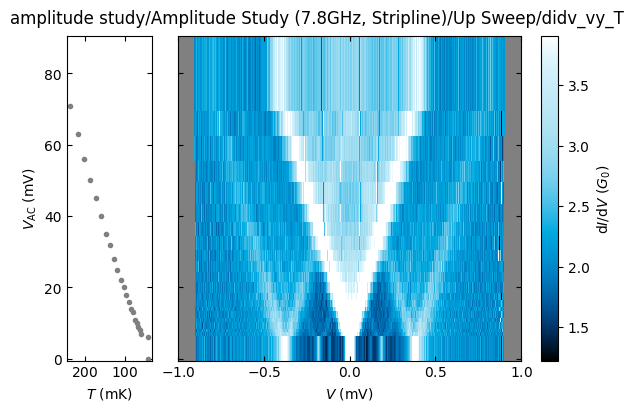

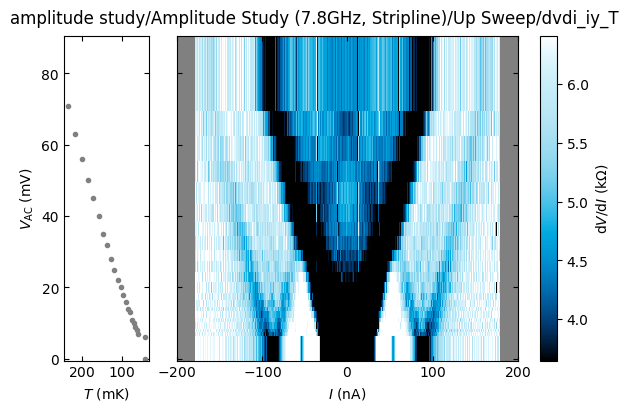

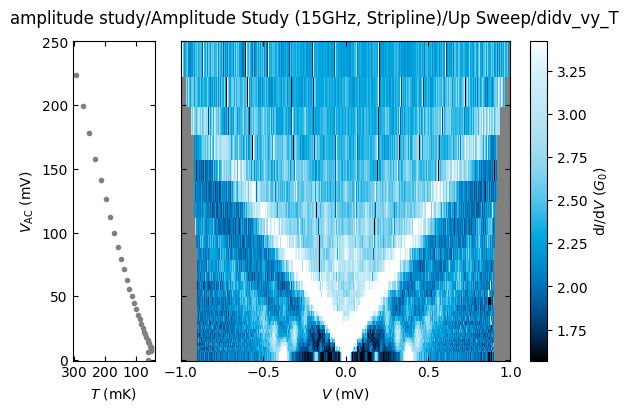

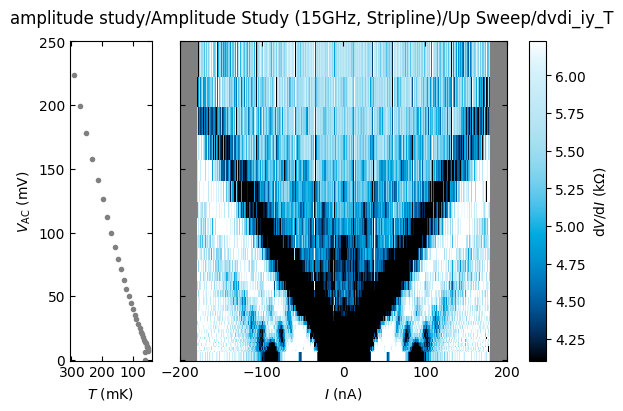

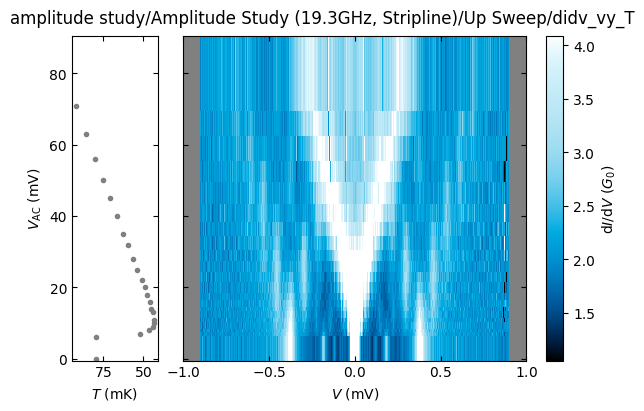

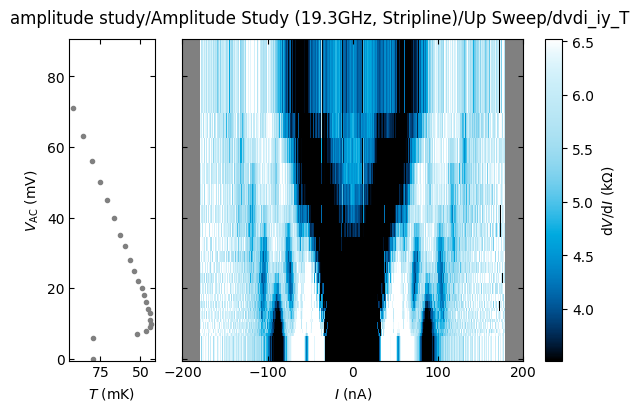

In [7]:
# Plot Amplitude Studies

eva.sub_folder = "amplitude study"
eva.y_characters = [r"$V_\mathrm{AC}$", "V"]


eva.title = "Amplitude Study (7.8GHz, Stripline)"
eva.loadData()
eva.to_plot = eva.up_sweep
eva.plot_all()

eva.title = "Amplitude Study (15GHz, Stripline)"
eva.loadData()
eva.to_plot = eva.up_sweep
eva.plot_all()

eva.title = "Amplitude Study (19.3GHz, Stripline)"
eva.loadData()
eva.to_plot = eva.up_sweep
eva.plot_all()

(base) Frequency Study (0.03V, Stripline)
(base) loadData()
(base plot) saveFigure()
(base plot) saveFigure()
(base) Frequency Study (0.02V, Stripline)
(base) loadData()
(base plot) saveFigure()
(base plot) saveFigure()


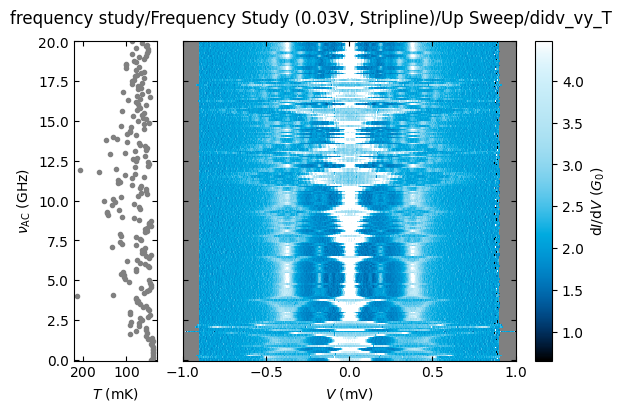

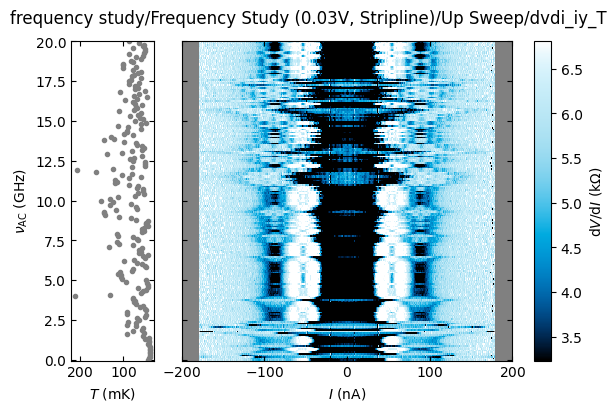

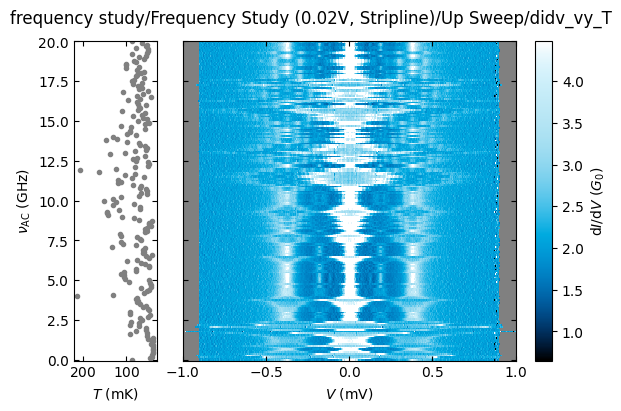

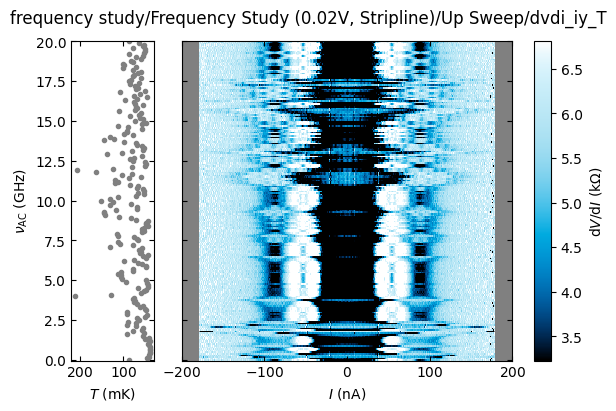

In [8]:
# Plot Frequency Studies

eva.sub_folder = "frequency study"
eva.y_characters = [r"$\nu_\mathrm{AC}$", "Hz"]

eva.title = "Frequency Study (0.03V, Stripline)"
eva.loadData()
eva.to_plot = eva.up_sweep
eva.plot_all()

eva.title = "Frequency Study (0.02V, Stripline)"
eva.loadData()
eva.to_plot = eva.up_sweep
eva.plot_all()

(base) Magnetic Field Study (Stripline)
(base) loadData()
(base plot) saveFigure()
(base plot) saveFigure()


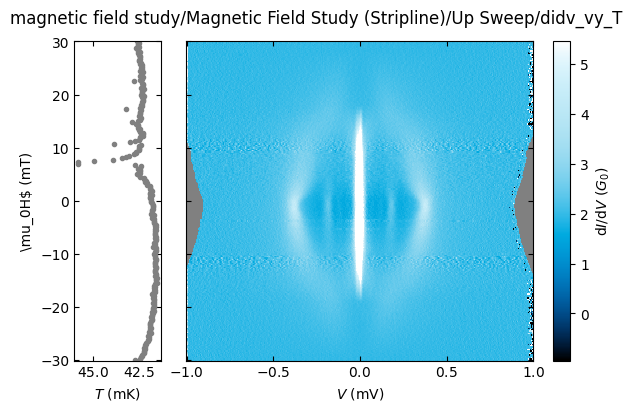

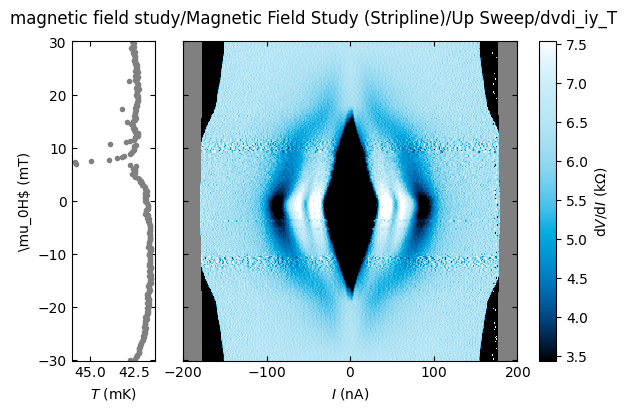

In [9]:
# Plot Magnetic Field Study

eva.sub_folder = "magnetic field study"
eva.y_characters = [r"\mu_0H$", "T"]

eva.title = "Magnetic Field Study (Stripline)"
eva.loadData()
eva.to_plot = eva.up_sweep
eva.plot_all()